In [53]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import FlowCytometryTools
from FlowCytometryTools import FCPlate
from FlowCytometryTools import ThresholdGate, PolyGate
from FlowCytometryTools import FCMeasurement
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [54]:
from FlowCytometryTools import PolyGate

# gate polygon for cells
gateCells_vertices = [(8.110e+03, 8.262e+03), (7.622e+03, 7.353e+03), (7.422e+03, 5.450e+03), (9.459e+03, 5.450e+03), (9.900e+03, 8.900e+03), (8.118e+03, 8.249e+03)]
# gate polygon for killers
gateK_vertices = [(4.880e+01, 4.006e+02), (2.892e+03, 2.998e+03), (4.381e+03, 4.578e+03), (6.107e+03, 6.482e+03), (7.664e+03, 8.538e+03), (3.298e+03, 6.807e+03), (3.129e+03, 6.763e+03), (4.888e+02, 4.448e+03), (-5.274e+01, 7.036e+02), (8.264e+01, 3.789e+02)]
# gate polygon for viable sensitives
gateSv_vertices = [(4.234e+03, 2.233e+03), (3.322e+03, 1.141e+03), (3.208e+03, 2.555e+02), (5.442e+03, 8.162e+02), (7.539e+03, 4.092e+03), (9.135e+03, 7.278e+03), (8.063e+03, 7.721e+03), (4.918e+03, 5.006e+03), (4.211e+03, 2.292e+03)]

gateCells = PolyGate(gateCells_vertices, ('FSC-A', 'SSC-A'), region='in', name='cells')
gateK = PolyGate(gateK_vertices, ('FITC-H', 'PE-H'), region='in', name='K')
gateSv = PolyGate(gateSv_vertices, ('FITC-H', 'PE-H'), region='in', name='S_viable')

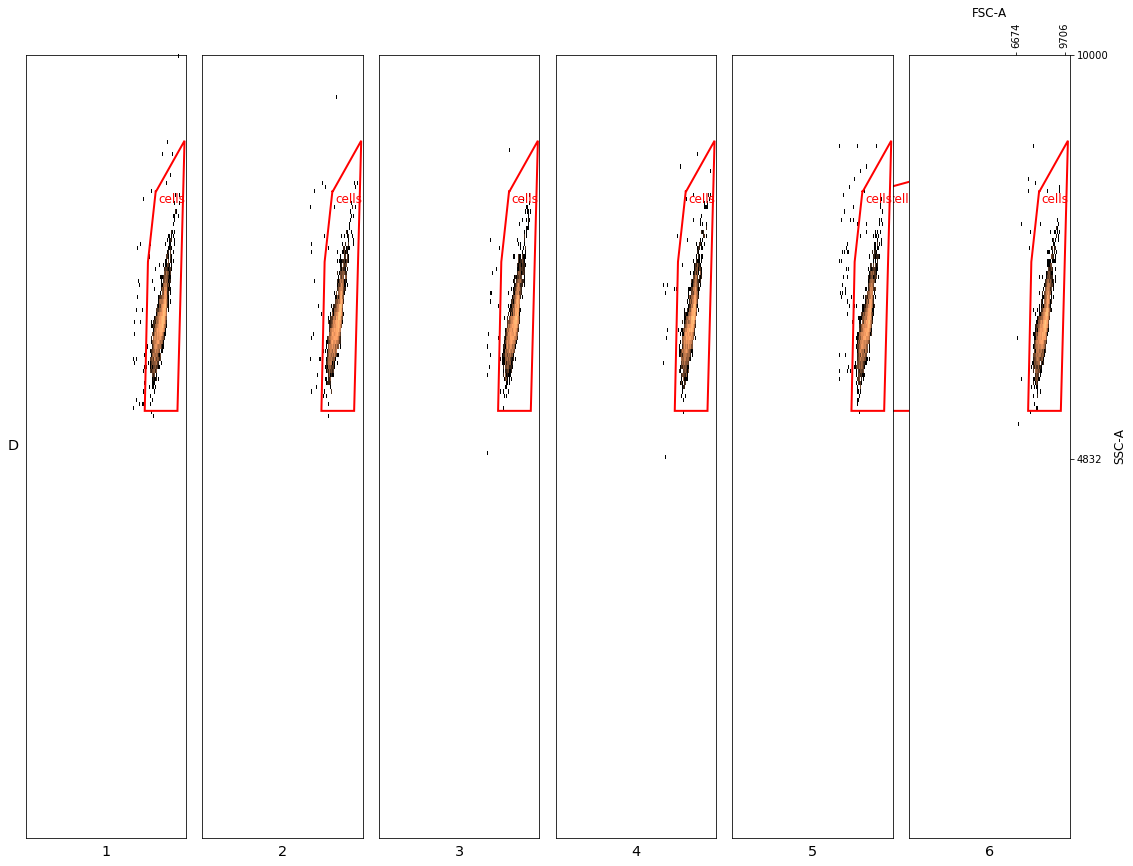

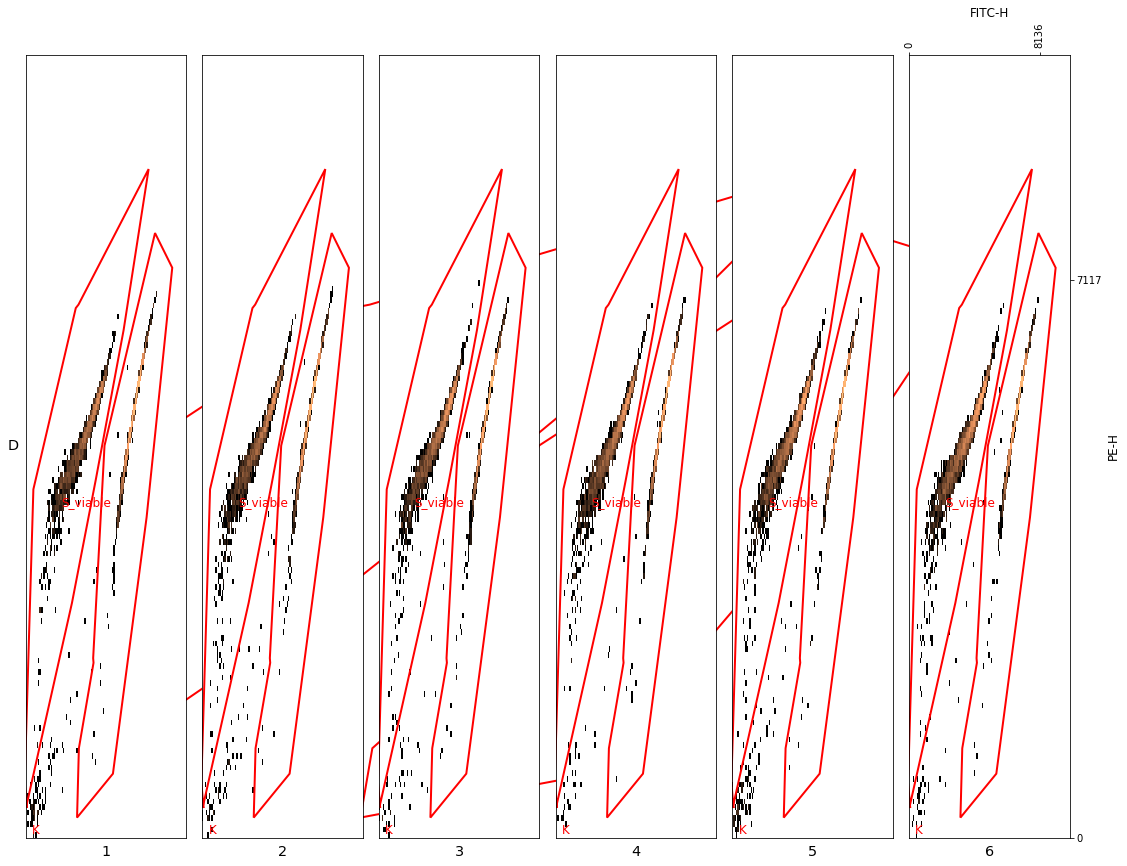

In [55]:
#Upload cytometry data from plate
datadir = './FACS/0h/'

plate_0h = FCPlate.from_dir(ID='0h', path=datadir, parser='name')
plate_0h = plate_0h.dropna()
plate_0h = plate_0h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_0h.plot(['FSC-A', 'SSC-A'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateCells_vertices, gateCells)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

fig = plt.figure(figsize=(20,15))
plate_0h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_0h_cells = plate_0h.gate(gateCells)

# cell counts
K_counts = plate_0h_cells.gate(gateK).counts()
Sv_counts = plate_0h_cells.gate(gateSv).counts()

# fractions (fv: only viable S - fa: both viable and non-viable)
fv_0h = K_counts/(K_counts+Sv_counts)

fv32_0h = [fv_0h.loc['D', 1]]
fv36_0h = [fv_0h.loc['D', 2]]
fv40_0h = [fv_0h.loc['D', 3]]
fv44_0h = [fv_0h.loc['D', 4]]
fv48_0h = [fv_0h.loc['D', 5]]
fv52_0h = [fv_0h.loc['D', 6]]

fv32_mean_0h = np.mean(fv32_0h)
fv36_mean_0h = np.mean(fv36_0h)
fv40_mean_0h = np.mean(fv40_0h)
fv44_mean_0h = np.mean(fv44_0h)
fv48_mean_0h = np.mean(fv48_0h)
fv52_mean_0h = np.mean(fv52_0h)

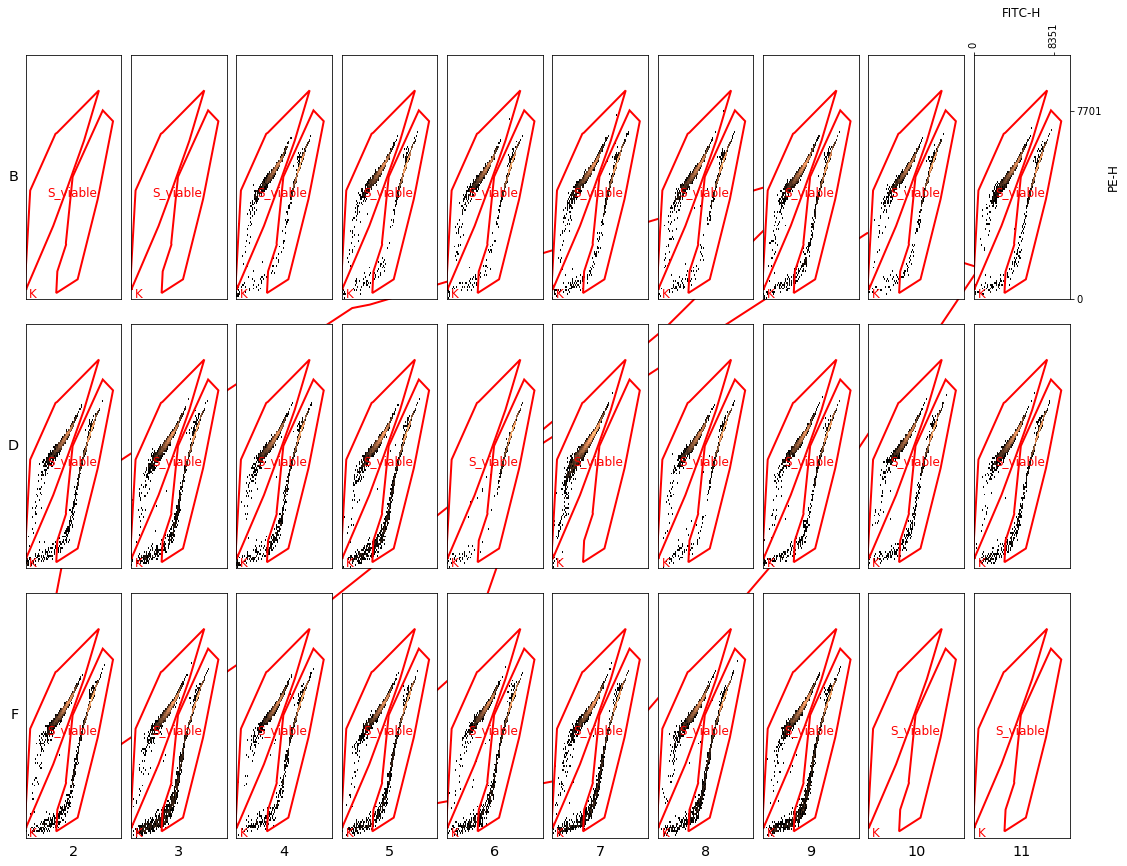

In [56]:
#Upload cytometry data from plate
datadir = './FACS/24h/'

plate_24h = FCPlate.from_dir(ID='24h', path=datadir, parser='name')
plate_24h = plate_24h.dropna()
plate_24h = plate_24h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_24h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_24h_cells = plate_24h.gate(gateCells)
K_counts = plate_24h_cells.gate(gateK).counts()
Sv_counts = plate_24h_cells.gate(gateSv).counts()

fv_24h = K_counts/(K_counts+Sv_counts)

fv32_24h_24h = [fv_24h.loc['B',4],fv_24h.loc['B',10],fv_24h.loc['D',8],fv_24h.loc['F',4]]
fv36_24h_24h = [fv_24h.loc['B',6],fv_24h.loc['D',2],fv_24h.loc['D',10],fv_24h.loc['F',6]]
fv40_24h_24h = [fv_24h.loc['B',5],fv_24h.loc['B',11],fv_24h.loc['D',9],fv_24h.loc['F',5]]
fv44_24h_24h = [fv_24h.loc['B',8],fv_24h.loc['D',4],fv_24h.loc['F',2],fv_24h.loc['F',8]]
fv48_24h_24h = [fv_24h.loc['B',7],fv_24h.loc['D',3],fv_24h.loc['D',11],fv_24h.loc['F',7]]
fv52_24h_24h = [fv_24h.loc['B',9],fv_24h.loc['D',5],fv_24h.loc['F',3],fv_24h.loc['F',9]]

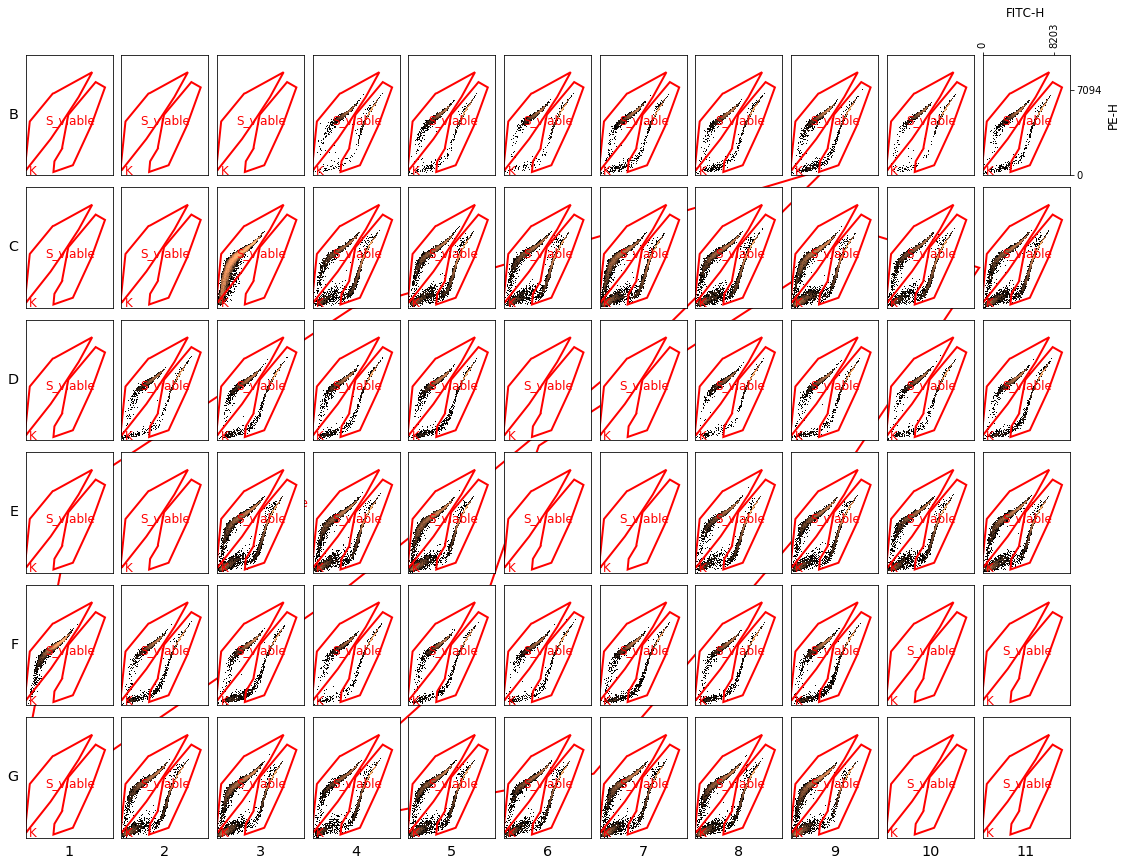

In [57]:
#Upload cytometry data from plate
datadir = './FACS/48h/'

plate_48h = FCPlate.from_dir(ID='48h', path=datadir, parser='name')
plate_48h = plate_48h.dropna()
plate_48h = plate_48h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_48h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_48h_cells = plate_48h.gate(gateCells)
K_counts = plate_48h_cells.gate(gateK).counts()
Sv_counts = plate_48h_cells.gate(gateSv).counts()

fv_48h = K_counts/(K_counts+Sv_counts)

fv32_24h_48h = [fv_48h.loc['B',4],fv_48h.loc['B',10],fv_48h.loc['D',8],fv_48h.loc['F',4]]
fv36_24h_48h = [fv_48h.loc['B',6],fv_48h.loc['D',2],fv_48h.loc['D',10],fv_48h.loc['F',6]]
fv40_24h_48h = [fv_48h.loc['B',5],fv_48h.loc['B',11],fv_48h.loc['D',9],fv_48h.loc['F',5]]
fv44_24h_48h = [fv_48h.loc['B',8],fv_48h.loc['D',4],fv_48h.loc['F',2],fv_48h.loc['F',8]]
fv48_24h_48h = [fv_48h.loc['B',7],fv_48h.loc['D',3],fv_48h.loc['D',11],fv_48h.loc['F',7]]
fv52_24h_48h = [fv_48h.loc['B',9],fv_48h.loc['D',5],fv_48h.loc['F',3],fv_48h.loc['F',9]]

fv32_48h_48h = [fv_48h.loc['C',4],fv_48h.loc['C',10],fv_48h.loc['E',8],fv_48h.loc['G',4]]
fv36_48h_48h = [fv_48h.loc['C',6],fv_48h.loc['E',2],fv_48h.loc['E',10],fv_48h.loc['G',6]]
fv40_48h_48h = [fv_48h.loc['C',5],fv_48h.loc['C',11],fv_48h.loc['E',9],fv_48h.loc['G',5]]
fv44_48h_48h = [fv_48h.loc['C',8],fv_48h.loc['E',4],fv_48h.loc['G',2],fv_48h.loc['G',8]]
fv48_48h_48h = [fv_48h.loc['C',7],fv_48h.loc['E',3],fv_48h.loc['E',11],fv_48h.loc['G',7]]
fv52_48h_48h = [fv_48h.loc['C',9],fv_48h.loc['E',5],fv_48h.loc['G',3],fv_48h.loc['G',9]]

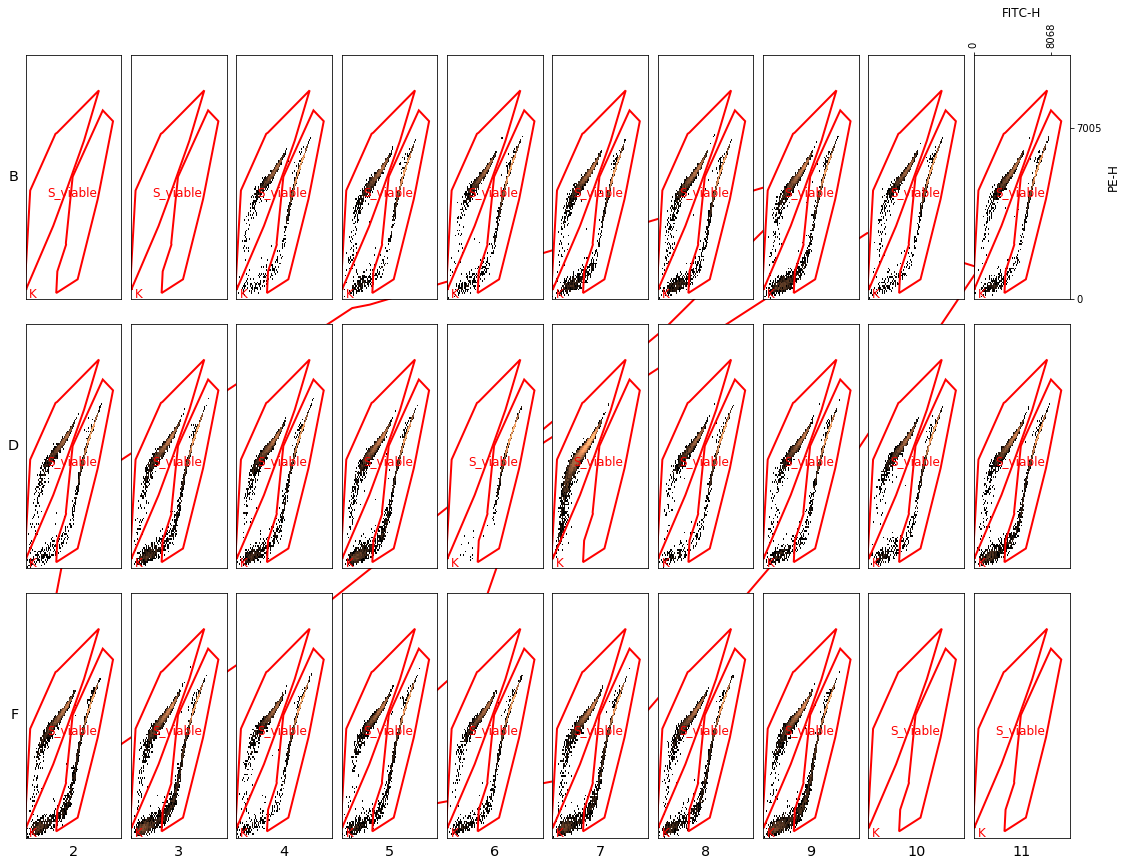

In [58]:
#Upload cytometry data from plate
datadir = './FACS/72h/'

plate_72h = FCPlate.from_dir(ID='72h', path=datadir, parser='name')
plate_72h = plate_72h.dropna()
plate_72h = plate_72h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_72h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_72h_cells = plate_72h.gate(gateCells)
K_counts = plate_72h_cells.gate(gateK).counts()
Sv_counts = plate_72h_cells.gate(gateSv).counts()

fv_72h = K_counts/(K_counts+Sv_counts)

fv32_24h_72h = [fv_72h.loc['B',4],fv_72h.loc['B',10],fv_72h.loc['D',8],fv_72h.loc['F',4]]
fv36_24h_72h = [fv_72h.loc['B',6],fv_72h.loc['D',2],fv_72h.loc['D',10],fv_72h.loc['F',6]]
fv40_24h_72h = [fv_72h.loc['B',5],fv_72h.loc['B',11],fv_72h.loc['D',9],fv_72h.loc['F',5]]
fv44_24h_72h = [fv_72h.loc['B',8],fv_72h.loc['D',4],fv_72h.loc['F',2],fv_72h.loc['F',8]]
fv48_24h_72h = [fv_72h.loc['B',7],fv_72h.loc['D',3],fv_72h.loc['D',11],fv_72h.loc['F',7]]
fv52_24h_72h = [fv_72h.loc['B',9],fv_72h.loc['D',5],fv_72h.loc['F',3],fv_72h.loc['F',9]]

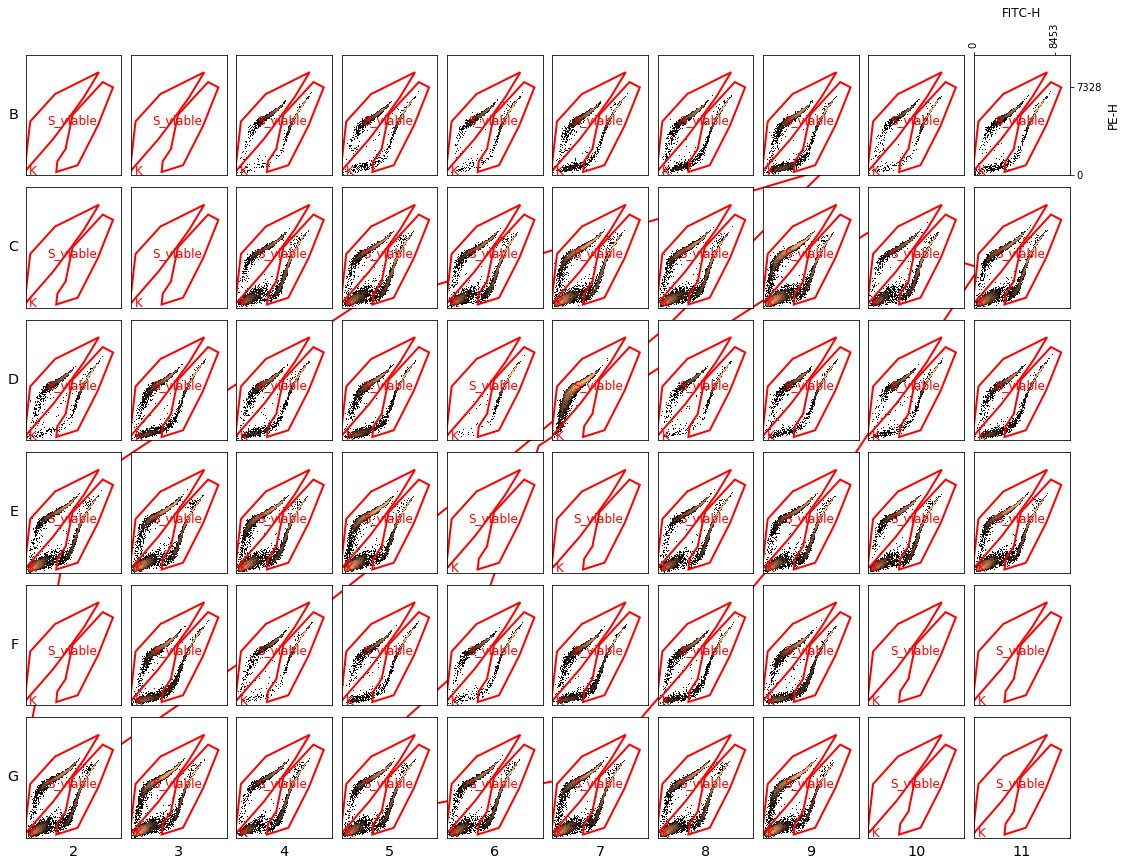

In [59]:
#Upload cytometry data from plate
datadir = './FACS/96h/'

plate_96h = FCPlate.from_dir(ID='96h', path=datadir, parser='name')
plate_96h = plate_96h.dropna()
plate_96h = plate_96h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_96h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_96h_cells = plate_96h.gate(gateCells)
K_counts = plate_96h_cells.gate(gateK).counts()
Sv_counts = plate_96h_cells.gate(gateSv).counts()

fv_96h = K_counts/(K_counts+Sv_counts)

fv32_24h_96h = [fv_96h.loc['B',4],fv_96h.loc['B',10],fv_96h.loc['D',8],fv_96h.loc['F',4]]
fv36_24h_96h = [fv_96h.loc['B',6],fv_96h.loc['D',2],fv_96h.loc['D',10],fv_96h.loc['F',6]]
fv40_24h_96h = [fv_96h.loc['B',5],fv_96h.loc['B',11],fv_96h.loc['D',9],fv_96h.loc['F',5]]
fv44_24h_96h = [fv_96h.loc['B',8],fv_96h.loc['D',4],fv_96h.loc['F',2],fv_96h.loc['F',8]]
fv48_24h_96h = [fv_96h.loc['B',7],fv_96h.loc['D',3],fv_96h.loc['D',11],fv_96h.loc['F',7]]
fv52_24h_96h = [fv_96h.loc['B',9],fv_96h.loc['D',5],fv_96h.loc['F',3],fv_96h.loc['F',9]]

fv32_48h_96h = [fv_96h.loc['C',4],fv_96h.loc['C',10],fv_96h.loc['E',8],fv_96h.loc['G',4]]
fv36_48h_96h = [fv_96h.loc['C',6],fv_96h.loc['E',2],fv_96h.loc['E',10],fv_96h.loc['G',6]]
fv40_48h_96h = [fv_96h.loc['C',5],fv_96h.loc['C',11],fv_96h.loc['E',9],fv_96h.loc['G',5]]
fv44_48h_96h = [fv_96h.loc['C',8],fv_96h.loc['E',4],fv_96h.loc['G',2],fv_96h.loc['G',8]]
fv48_48h_96h = [fv_96h.loc['C',7],fv_96h.loc['E',3],fv_96h.loc['E',11],fv_96h.loc['G',7]]
fv52_48h_96h = [fv_96h.loc['C',9],fv_96h.loc['E',5],fv_96h.loc['G',3],fv_96h.loc['G',9]]

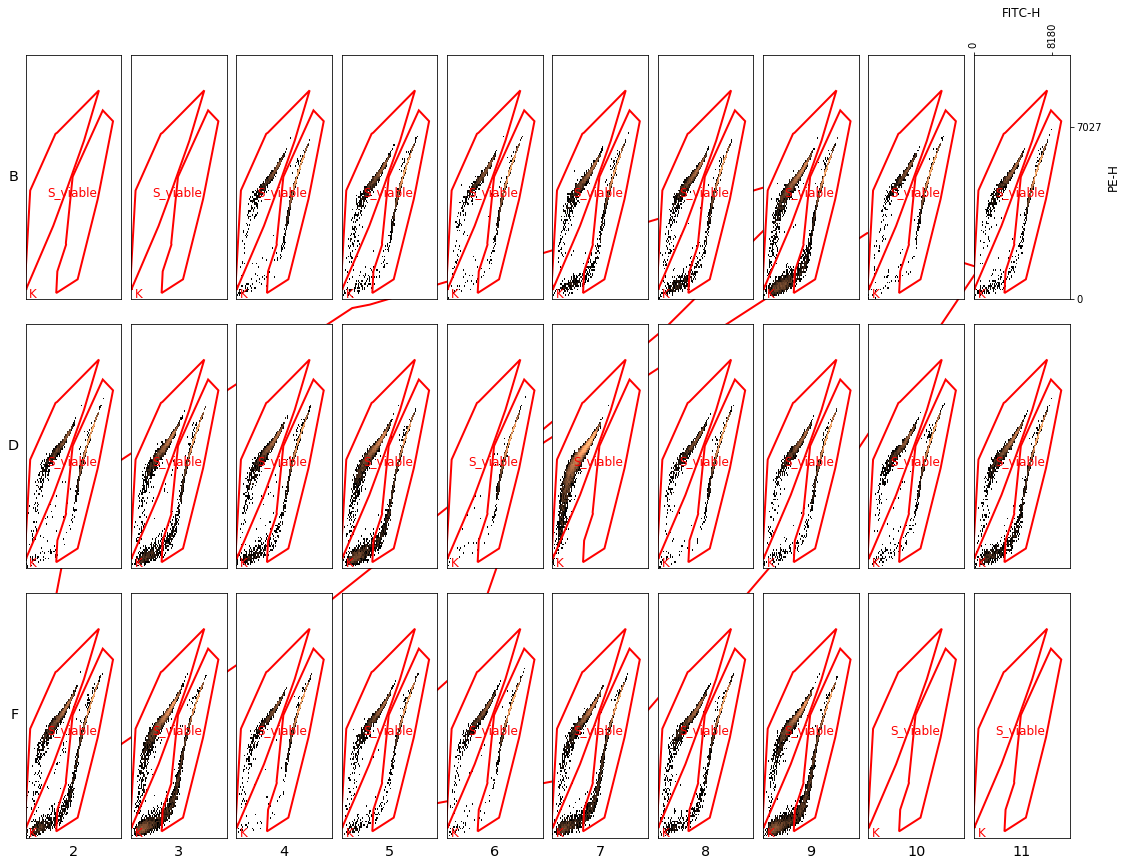

In [60]:
#Upload cytometry data from plate
datadir = './FACS/120h/'

plate_120h = FCPlate.from_dir(ID='120h', path=datadir, parser='name')
plate_120h = plate_120h.dropna()
plate_120h = plate_120h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_120h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_120h_cells = plate_120h.gate(gateCells)
K_counts = plate_120h_cells.gate(gateK).counts()
Sv_counts = plate_120h_cells.gate(gateSv).counts()

fv_120h = K_counts/(K_counts+Sv_counts)

fv32_24h_120h = [fv_120h.loc['B',4],fv_120h.loc['B',10],fv_120h.loc['D',8],fv_120h.loc['F',4]]
fv36_24h_120h = [fv_120h.loc['B',6],fv_120h.loc['D',2],fv_120h.loc['D',10],fv_120h.loc['F',6]]
fv40_24h_120h = [fv_120h.loc['B',5],fv_120h.loc['B',11],fv_120h.loc['D',9],fv_120h.loc['F',5]]
fv44_24h_120h = [fv_120h.loc['B',8],fv_120h.loc['D',4],fv_120h.loc['F',2],fv_120h.loc['F',8]]
fv48_24h_120h = [fv_120h.loc['B',7],fv_120h.loc['D',3],fv_120h.loc['D',11],fv_120h.loc['F',7]]
fv52_24h_120h = [fv_120h.loc['B',9],fv_120h.loc['D',5],fv_120h.loc['F',3],fv_120h.loc['F',9]]

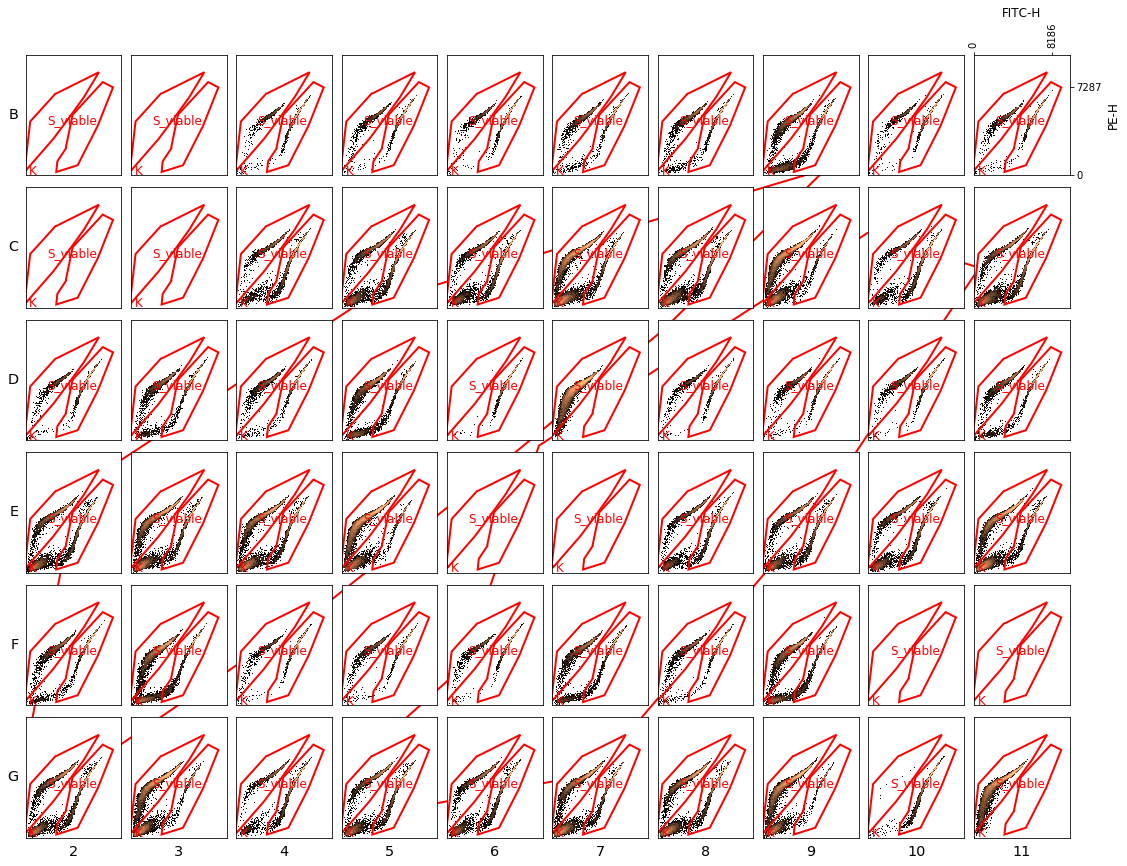

In [61]:
#Upload cytometry data from plate
datadir = './FACS/144h/'

plate_144h = FCPlate.from_dir(ID='144h', path=datadir, parser='name')
plate_144h = plate_144h.dropna()
plate_144h = plate_144h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_144h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_144h_cells = plate_144h.gate(gateCells)
K_counts = plate_144h_cells.gate(gateK).counts()
Sv_counts = plate_144h_cells.gate(gateSv).counts()

fv_144h = K_counts/(K_counts+Sv_counts)

fv32_24h_144h = [fv_144h.loc['B',4],fv_144h.loc['B',10],fv_144h.loc['D',8],fv_144h.loc['F',4]]
fv36_24h_144h = [fv_144h.loc['B',6],fv_144h.loc['D',2],fv_144h.loc['D',10],fv_144h.loc['F',6]]
fv40_24h_144h = [fv_144h.loc['B',5],fv_144h.loc['B',11],fv_144h.loc['D',9],fv_144h.loc['F',5]]
fv44_24h_144h = [fv_144h.loc['B',8],fv_144h.loc['D',4],fv_144h.loc['F',2],fv_144h.loc['F',8]]
fv48_24h_144h = [fv_144h.loc['B',7],fv_144h.loc['D',3],fv_144h.loc['D',11],fv_144h.loc['F',7]]
fv52_24h_144h = [fv_144h.loc['B',9],fv_144h.loc['D',5],fv_144h.loc['F',3],fv_144h.loc['F',9]]

fv32_48h_144h = [fv_144h.loc['C',4],fv_144h.loc['C',10],fv_144h.loc['E',8],fv_144h.loc['G',4]]
fv36_48h_144h = [fv_144h.loc['C',6],fv_144h.loc['E',2],fv_144h.loc['E',10],fv_144h.loc['G',6]]
fv40_48h_144h = [fv_144h.loc['C',5],fv_144h.loc['C',11],fv_144h.loc['E',9],fv_144h.loc['G',5]]
fv44_48h_144h = [fv_144h.loc['C',8],fv_144h.loc['E',4],fv_144h.loc['G',2],fv_144h.loc['G',8]]
fv48_48h_144h = [fv_144h.loc['C',7],fv_144h.loc['E',3],fv_144h.loc['E',11],fv_144h.loc['G',7]]
fv52_48h_144h = [fv_144h.loc['C',9],fv_144h.loc['E',5],fv_144h.loc['G',3],fv_144h.loc['G',9]]

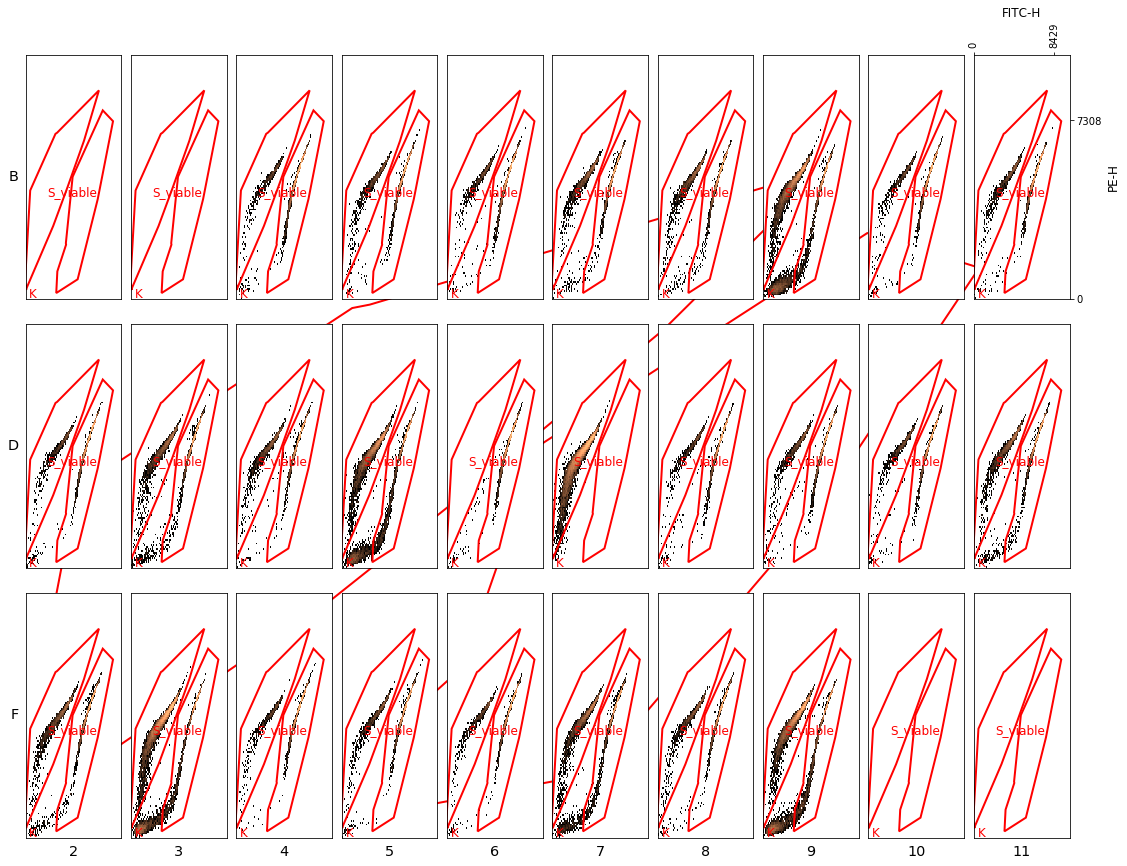

In [62]:
#Upload cytometry data from plate
datadir = './FACS/168h/'

plate_168h = FCPlate.from_dir(ID='168h', path=datadir, parser='name')
plate_168h = plate_168h.dropna()
plate_168h = plate_168h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_168h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_168h_cells = plate_168h.gate(gateCells)
K_counts = plate_168h.gate(gateK).counts()
Sv_counts = plate_168h.gate(gateSv).counts()

fv_168h = K_counts/(K_counts+Sv_counts)

fv32_24h_168h = [fv_168h.loc['B',4],fv_168h.loc['B',10],fv_168h.loc['D',8],fv_168h.loc['F',4]]
fv36_24h_168h = [fv_168h.loc['B',6],fv_168h.loc['D',2],fv_168h.loc['D',10],fv_168h.loc['F',6]]
fv40_24h_168h = [fv_168h.loc['B',5],fv_168h.loc['B',11],fv_168h.loc['D',9],fv_168h.loc['F',5]]
fv44_24h_168h = [fv_168h.loc['B',8],fv_168h.loc['D',4],fv_168h.loc['F',2],fv_168h.loc['F',8]]
fv48_24h_168h = [fv_168h.loc['B',7],fv_168h.loc['D',3],fv_168h.loc['D',11],fv_168h.loc['F',7]]
fv52_24h_168h = [fv_168h.loc['B',9],fv_168h.loc['D',5],fv_168h.loc['F',3],fv_168h.loc['F',9]]

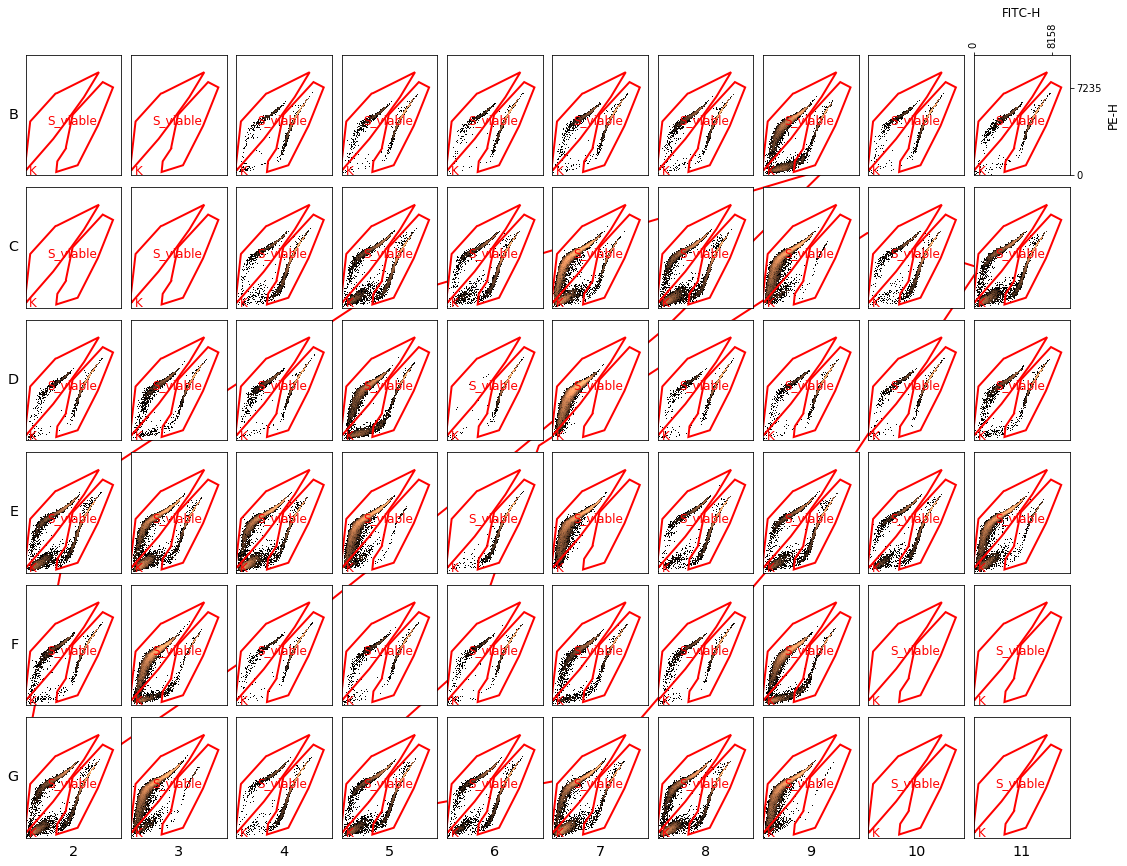

In [63]:
#Upload cytometry data from plate
datadir = './FACS/192h/'

plate_192h = FCPlate.from_dir(ID='192h', path=datadir, parser='name')
plate_192h = plate_192h.dropna()
plate_192h = plate_192h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_192h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_192h_cells = plate_192h.gate(gateCells)
K_counts = plate_192h_cells.gate(gateK).counts()
Sv_counts = plate_192h_cells.gate(gateSv).counts()

fv_192h = K_counts/(K_counts+Sv_counts)

fv32_24h_192h = [fv_192h.loc['B',4],fv_192h.loc['B',10],fv_192h.loc['D',8],fv_192h.loc['F',4]]
fv36_24h_192h = [fv_192h.loc['B',6],fv_192h.loc['D',2],fv_192h.loc['D',10],fv_192h.loc['F',6]]
fv40_24h_192h = [fv_192h.loc['B',5],fv_192h.loc['B',11],fv_192h.loc['D',9],fv_192h.loc['F',5]]
fv44_24h_192h = [fv_192h.loc['B',8],fv_192h.loc['D',4],fv_192h.loc['F',2],fv_192h.loc['F',8]]
fv48_24h_192h = [fv_192h.loc['B',7],fv_192h.loc['D',3],fv_192h.loc['D',11],fv_192h.loc['F',7]]
fv52_24h_192h = [fv_192h.loc['B',9],fv_192h.loc['D',5],fv_192h.loc['F',3],fv_192h.loc['F',9]]

fv32_48h_192h = [fv_192h.loc['C',4],fv_192h.loc['C',10],fv_192h.loc['E',8],fv_192h.loc['G',4]]
fv36_48h_192h = [fv_192h.loc['C',6],fv_192h.loc['E',2],fv_192h.loc['E',10],fv_192h.loc['G',6]]
fv40_48h_192h = [fv_192h.loc['C',5],fv_192h.loc['C',11],fv_192h.loc['E',9],fv_192h.loc['G',5]]
fv44_48h_192h = [fv_192h.loc['C',8],fv_192h.loc['E',4],fv_192h.loc['G',2],fv_192h.loc['G',8]]
fv48_48h_192h = [fv_192h.loc['C',7],fv_192h.loc['E',3],fv_192h.loc['E',11],fv_192h.loc['G',7]]
fv52_48h_192h = [fv_192h.loc['C',9],fv_192h.loc['E',5],fv_192h.loc['G',3],fv_192h.loc['G',9]]

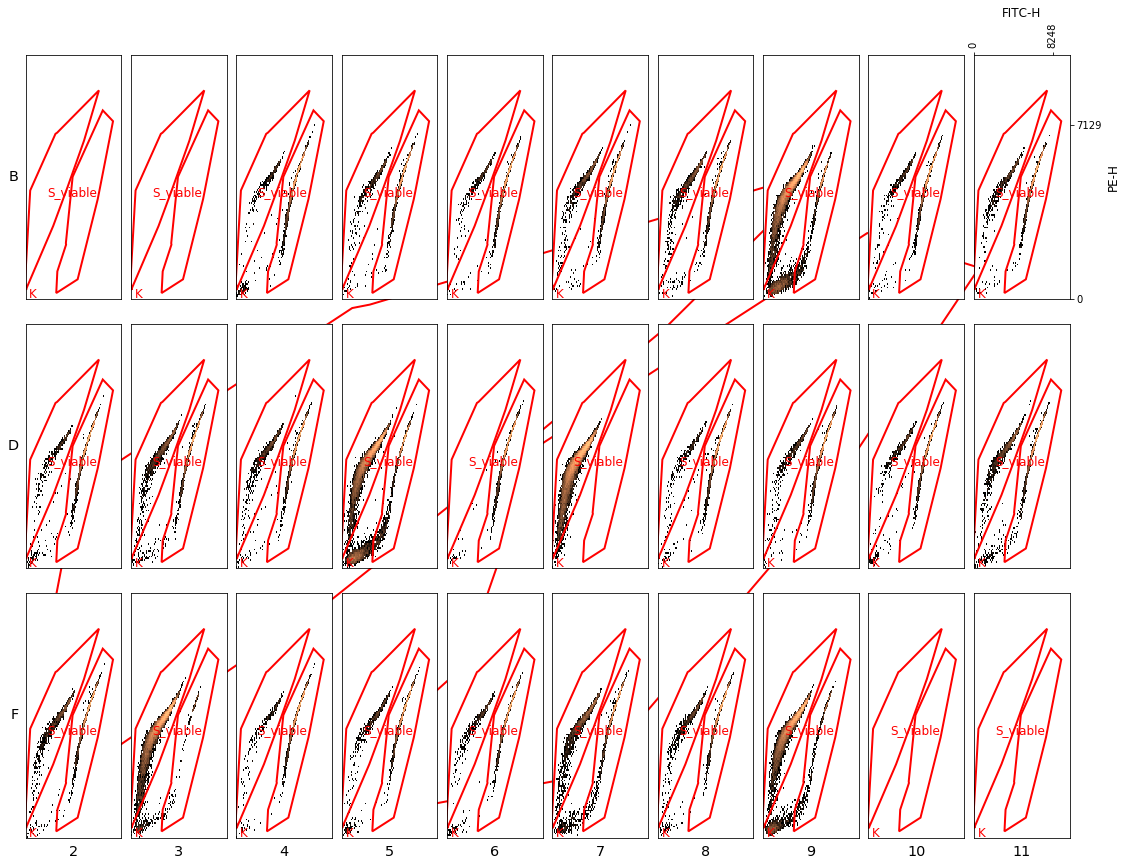

In [64]:
#Upload cytometry data from plate
datadir = './FACS/216h/'

plate_216h = FCPlate.from_dir(ID='216h', path=datadir, parser='name')
plate_216h = plate_216h.dropna()
plate_216h = plate_216h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_216h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_216h_cells = plate_216h.gate(gateCells)
K_counts = plate_216h.gate(gateK).counts()
Sv_counts = plate_216h.gate(gateSv).counts()

fv_216h = K_counts/(K_counts+Sv_counts)

fv32_24h_216h = [fv_216h.loc['B',4],fv_216h.loc['B',10],fv_216h.loc['D',8],fv_216h.loc['F',4]]
fv36_24h_216h = [fv_216h.loc['B',6],fv_216h.loc['D',2],fv_216h.loc['D',10],fv_216h.loc['F',6]]
fv40_24h_216h = [fv_216h.loc['B',5],fv_216h.loc['B',11],fv_216h.loc['D',9],fv_216h.loc['F',5]]
fv44_24h_216h = [fv_216h.loc['B',8],fv_216h.loc['D',4],fv_216h.loc['F',2],fv_216h.loc['F',8]]
fv48_24h_216h = [fv_216h.loc['B',7],fv_216h.loc['D',3],fv_216h.loc['D',11],fv_216h.loc['F',7]]
fv52_24h_216h = [fv_216h.loc['B',9],fv_216h.loc['D',5],fv_216h.loc['F',3],fv_216h.loc['F',9]]

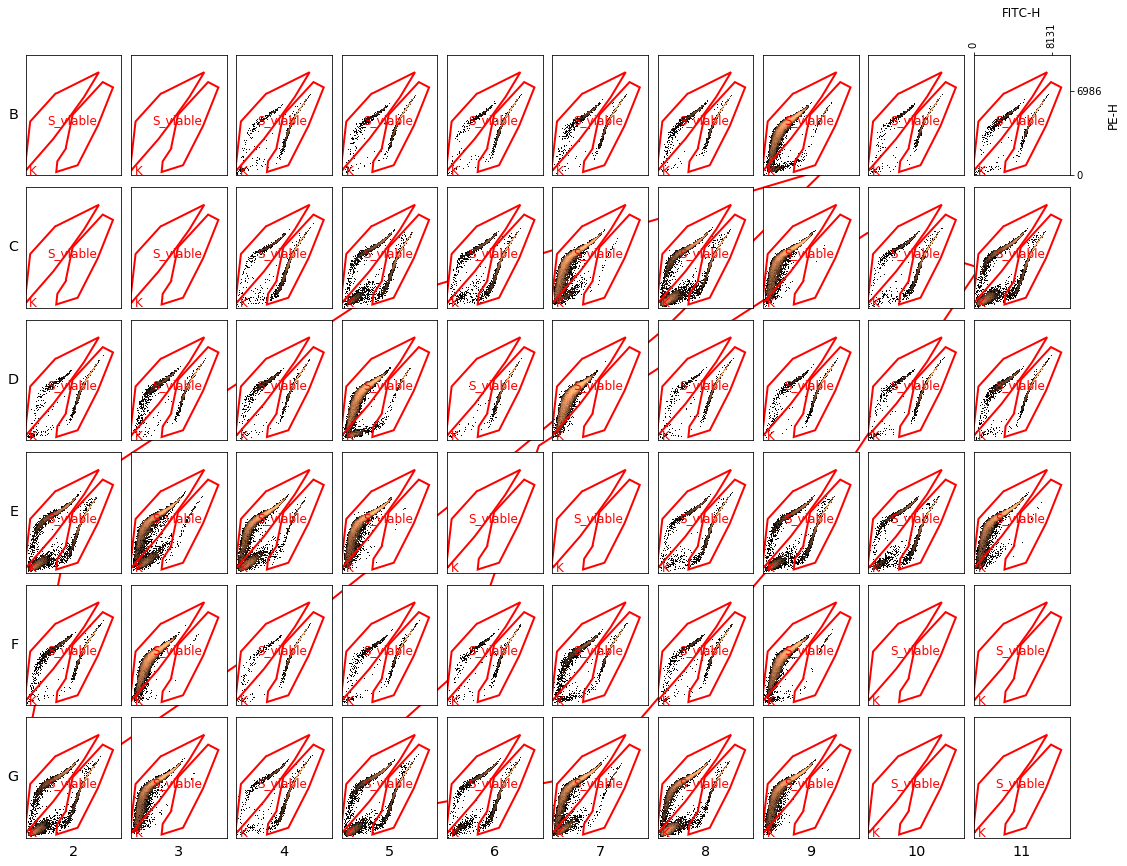

In [65]:
#Upload cytometry data from plate
datadir = './FACS/240h/'

plate_240h = FCPlate.from_dir(ID='240h', path=datadir, parser='name')
plate_240h = plate_240h.dropna()
plate_240h = plate_240h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_240h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_240h_cells = plate_240h.gate(gateCells)
K_counts = plate_240h.gate(gateK).counts()
Sv_counts = plate_240h.gate(gateSv).counts()

fv_240h = K_counts/(K_counts+Sv_counts)

fv32_24h_240h = [fv_240h.loc['B',4],fv_240h.loc['B',10],fv_240h.loc['D',8],fv_240h.loc['F',4]]
fv36_24h_240h = [fv_240h.loc['B',6],fv_240h.loc['D',2],fv_240h.loc['D',10],fv_240h.loc['F',6]]
fv40_24h_240h = [fv_240h.loc['B',5],fv_240h.loc['B',11],fv_240h.loc['D',9],fv_240h.loc['F',5]]
fv44_24h_240h = [fv_240h.loc['B',8],fv_240h.loc['D',4],fv_240h.loc['F',2],fv_240h.loc['F',8]]
fv48_24h_240h = [fv_240h.loc['B',7],fv_240h.loc['D',3],fv_240h.loc['D',11],fv_240h.loc['F',7]]
fv52_24h_240h = [fv_240h.loc['B',9],fv_240h.loc['D',5],fv_240h.loc['F',3],fv_240h.loc['F',9]]

fv32_48h_240h = [fv_240h.loc['C',4],fv_240h.loc['C',10],fv_240h.loc['E',8],fv_240h.loc['G',4]]
fv36_48h_240h = [fv_240h.loc['C',6],fv_240h.loc['E',2],fv_240h.loc['E',10],fv_240h.loc['G',6]]
fv40_48h_240h = [fv_240h.loc['C',5],fv_240h.loc['C',11],fv_240h.loc['E',9],fv_240h.loc['G',5]]
fv44_48h_240h = [fv_240h.loc['C',8],fv_240h.loc['E',4],fv_240h.loc['G',2],fv_240h.loc['G',8]]
fv48_48h_240h = [fv_240h.loc['C',7],fv_240h.loc['E',3],fv_240h.loc['E',11],fv_240h.loc['G',7]]
fv52_48h_240h = [fv_240h.loc['C',9],fv_240h.loc['E',5],fv_240h.loc['G',3],fv_240h.loc['G',9]]

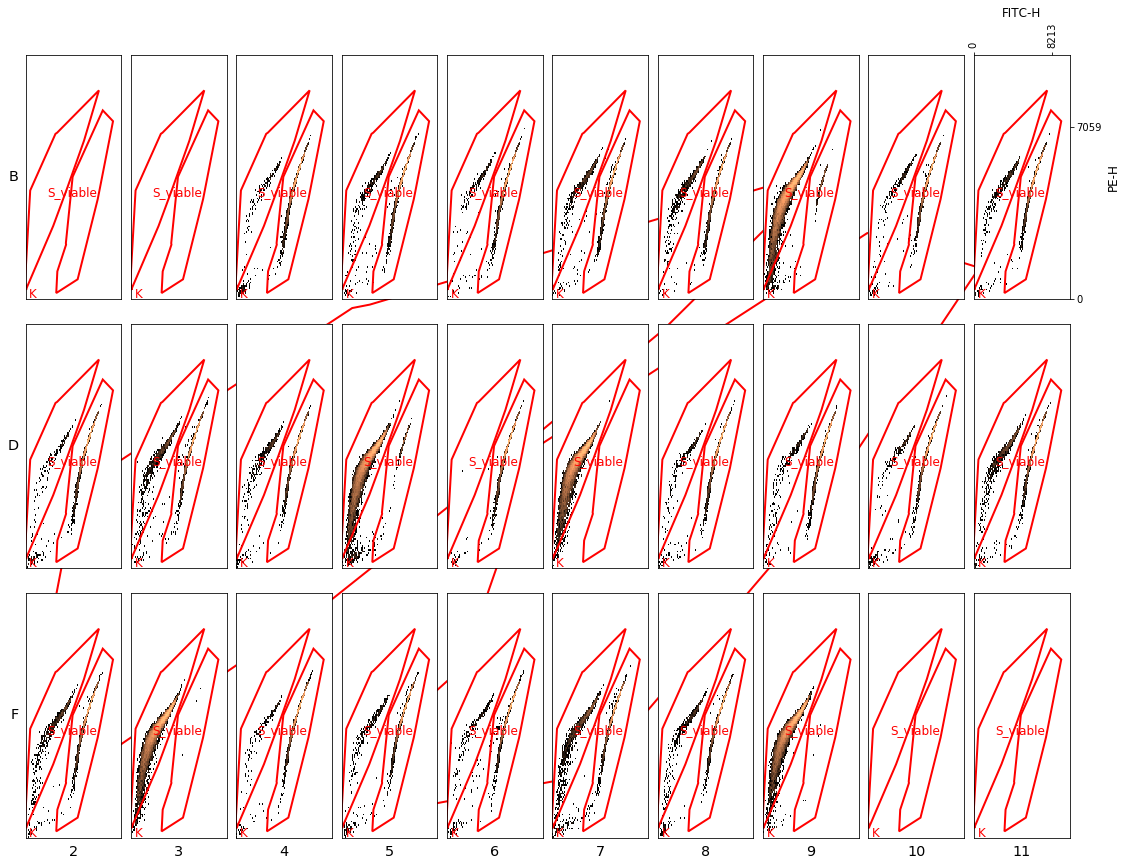

In [66]:
#Upload cytometry data from plate
datadir = './FACS/264h/'

plate_264h = FCPlate.from_dir(ID='264h', path=datadir, parser='name')
plate_264h = plate_264h.dropna()
plate_264h = plate_264h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_264h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_264h_cells = plate_264h.gate(gateCells)
K_counts = plate_264h_cells.gate(gateK).counts()
Sv_counts = plate_264h_cells.gate(gateSv).counts()

fv_264h = K_counts/(K_counts+Sv_counts)

fv32_24h_264h = [fv_264h.loc['B',4],fv_264h.loc['B',10],fv_264h.loc['D',8],fv_264h.loc['F',4]]
fv36_24h_264h = [fv_264h.loc['B',6],fv_264h.loc['D',2],fv_264h.loc['D',10],fv_264h.loc['F',6]]
fv40_24h_264h = [fv_264h.loc['B',5],fv_264h.loc['B',11],fv_264h.loc['D',9],fv_264h.loc['F',5]]
fv44_24h_264h = [fv_264h.loc['B',8],fv_264h.loc['D',4],fv_264h.loc['F',2],fv_264h.loc['F',8]]
fv48_24h_264h = [fv_264h.loc['B',7],fv_264h.loc['D',3],fv_264h.loc['D',11],fv_264h.loc['F',7]]
fv52_24h_264h = [fv_264h.loc['B',9],fv_264h.loc['D',5],fv_264h.loc['F',3],fv_264h.loc['F',9]]

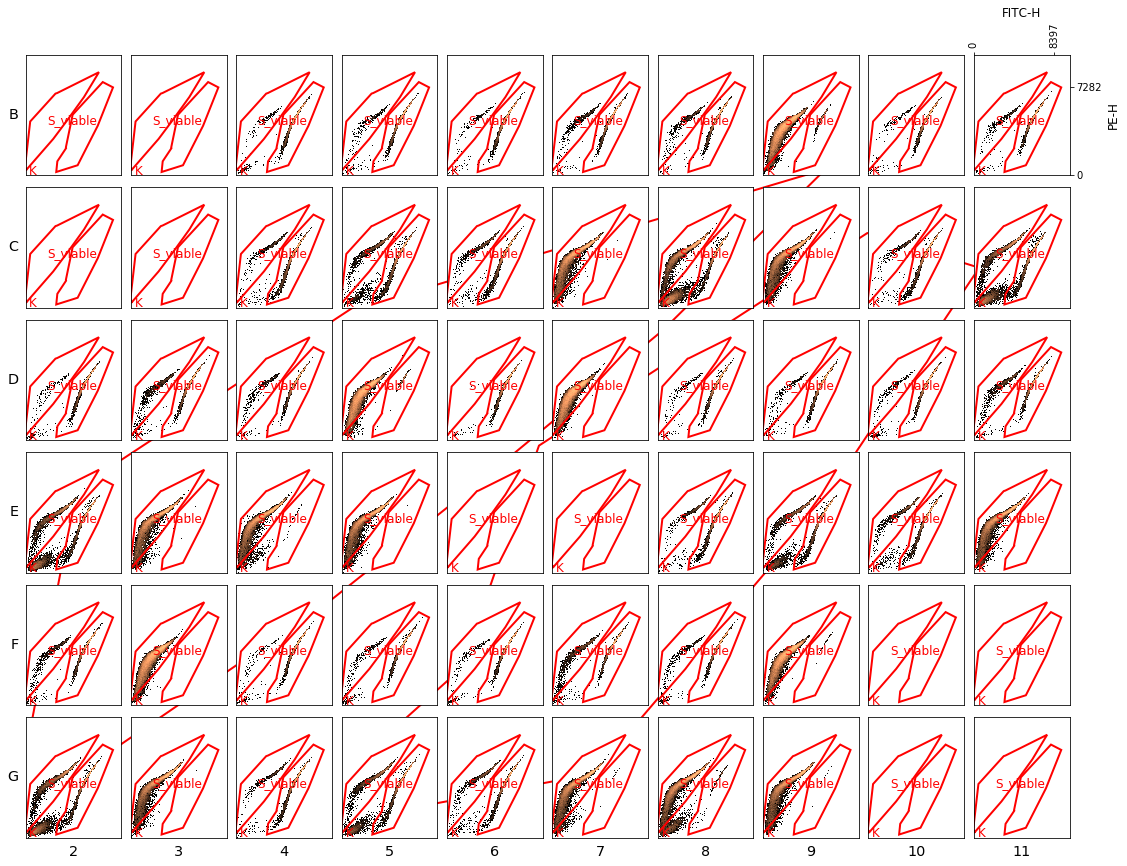

In [67]:
#Upload cytometry data from plate
datadir = './FACS/288h/'

plate_288h = FCPlate.from_dir(ID='288h', path=datadir, parser='name')
plate_288h = plate_288h.dropna()
plate_288h = plate_288h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_288h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_288h_cells = plate_288h.gate(gateCells)
K_counts = plate_288h_cells.gate(gateK).counts()
Sv_counts = plate_288h_cells.gate(gateSv).counts()

fv_288h = K_counts/(K_counts+Sv_counts)

fv32_24h_288h = [fv_288h.loc['B',4],fv_288h.loc['B',10],fv_288h.loc['D',8],fv_288h.loc['F',4]]
fv36_24h_288h = [fv_288h.loc['B',6],fv_288h.loc['D',2],fv_288h.loc['D',10],fv_288h.loc['F',6]]
fv40_24h_288h = [fv_288h.loc['B',5],fv_288h.loc['B',11],fv_288h.loc['D',9],fv_288h.loc['F',5]]
fv44_24h_288h = [fv_288h.loc['B',8],fv_288h.loc['D',4],fv_288h.loc['F',2],fv_288h.loc['F',8]]
fv48_24h_288h = [fv_288h.loc['B',7],fv_288h.loc['D',3],fv_288h.loc['D',11],fv_288h.loc['F',7]]
fv52_24h_288h = [fv_288h.loc['B',9],fv_288h.loc['D',5],fv_288h.loc['F',3],fv_288h.loc['F',9]]

fv32_48h_288h = [fv_288h.loc['C',4],fv_288h.loc['C',10],fv_288h.loc['E',8],fv_288h.loc['G',4]]
fv36_48h_288h = [fv_288h.loc['C',6],fv_288h.loc['E',2],fv_288h.loc['E',10],fv_288h.loc['G',6]]
fv40_48h_288h = [fv_288h.loc['C',5],fv_288h.loc['C',11],fv_288h.loc['E',9],fv_288h.loc['G',5]]
fv44_48h_288h = [fv_288h.loc['C',8],fv_288h.loc['E',4],fv_288h.loc['G',2],fv_288h.loc['G',8]]
fv48_48h_288h = [fv_288h.loc['C',7],fv_288h.loc['E',3],fv_288h.loc['E',11],fv_288h.loc['G',7]]
fv52_48h_288h = [fv_288h.loc['C',9],fv_288h.loc['E',5],fv_288h.loc['G',3],fv_288h.loc['G',9]]

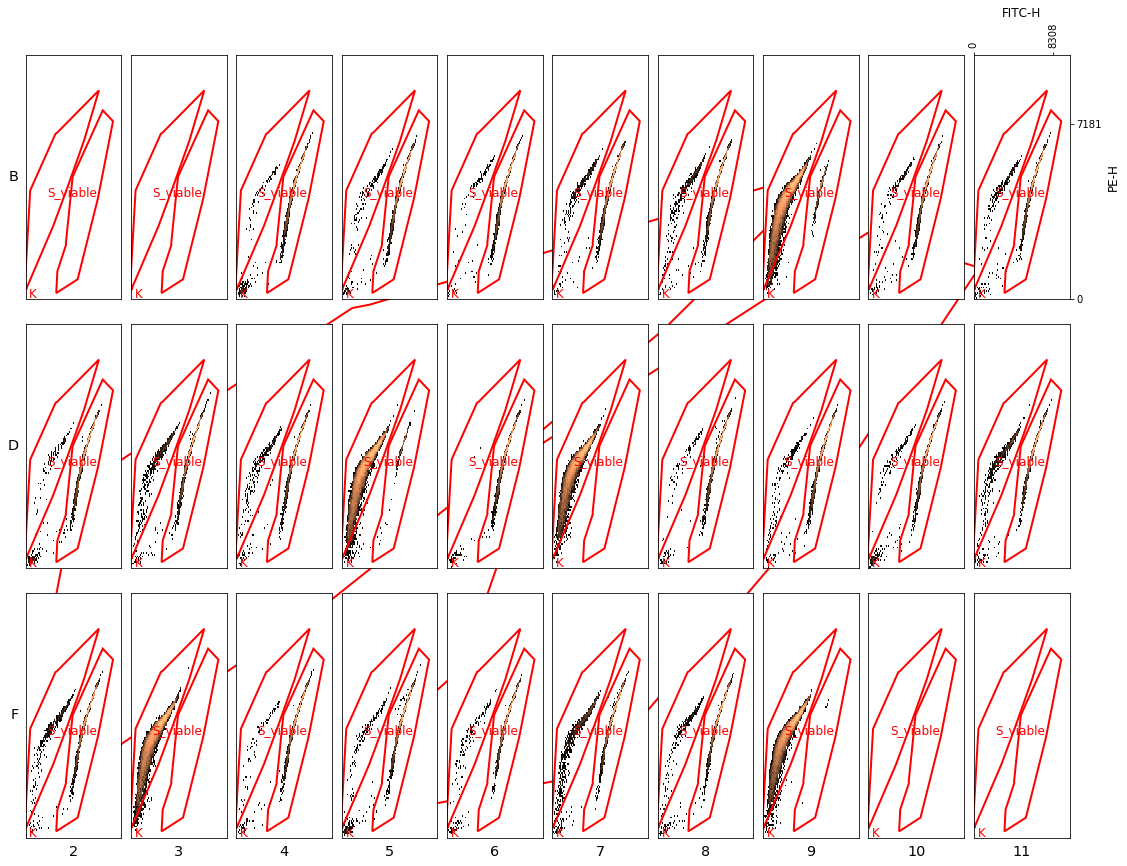

In [68]:
#Upload cytometry data from plate
datadir = './FACS/312h/'

plate_312h = FCPlate.from_dir(ID='312h', path=datadir, parser='name')
plate_312h = plate_312h.dropna()
plate_312h = plate_312h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_312h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_312h_cells = plate_312h.gate(gateCells)
K_counts = plate_312h.gate(gateK).counts()
Sv_counts = plate_312h.gate(gateSv).counts()

fv_312h = K_counts/(K_counts+Sv_counts)

fv32_24h_312h = [fv_312h.loc['B',4],fv_312h.loc['B',10],fv_312h.loc['D',8],fv_312h.loc['F',4]]
fv36_24h_312h = [fv_312h.loc['B',6],fv_312h.loc['D',2],fv_312h.loc['D',10],fv_312h.loc['F',6]]
fv40_24h_312h = [fv_312h.loc['B',5],fv_312h.loc['B',11],fv_312h.loc['D',9],fv_312h.loc['F',5]]
fv44_24h_312h = [fv_312h.loc['B',8],fv_312h.loc['D',4],fv_312h.loc['F',2],fv_312h.loc['F',8]]
fv48_24h_312h = [fv_312h.loc['B',7],fv_312h.loc['D',3],fv_312h.loc['D',11],fv_312h.loc['F',7]]
fv52_24h_312h = [fv_312h.loc['B',9],fv_312h.loc['D',5],fv_312h.loc['F',3],fv_312h.loc['F',9]]

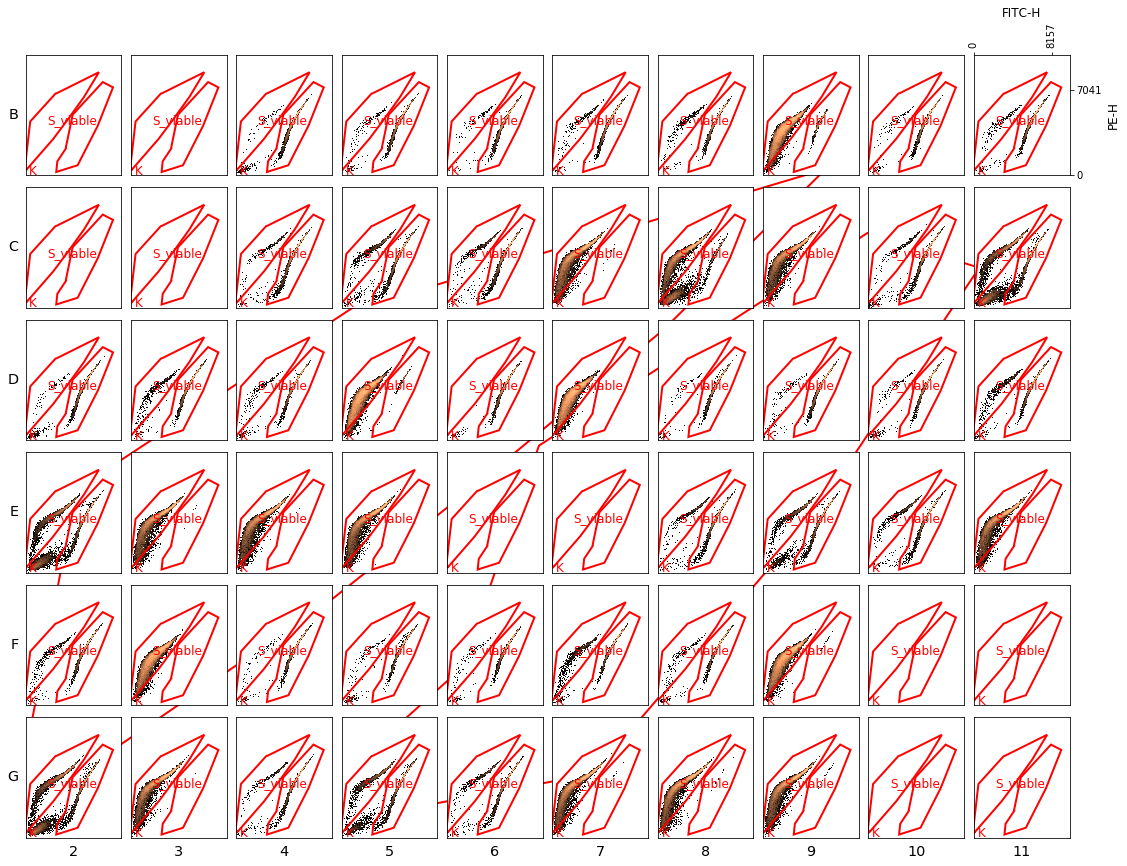

In [69]:
#Upload cytometry data from plate
datadir = './FACS/336h/'

plate_336h = FCPlate.from_dir(ID='336h', path=datadir, parser='name')
plate_336h = plate_336h.dropna()
plate_336h = plate_336h.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_336h.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# # Get the current axes object
# ax = plt.gca()

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_336h_cells = plate_336h.gate(gateCells)
K_counts = plate_336h.gate(gateK).counts()
Sv_counts = plate_336h.gate(gateSv).counts()

fv_336h = K_counts/(K_counts+Sv_counts)

fv32_24h_336h = [fv_336h.loc['B',4],fv_336h.loc['B',10],fv_336h.loc['D',8],fv_336h.loc['F',4]]
fv36_24h_336h = [fv_336h.loc['B',6],fv_336h.loc['D',2],fv_336h.loc['D',10],fv_336h.loc['F',6]]
fv40_24h_336h = [fv_336h.loc['B',5],fv_336h.loc['B',11],fv_336h.loc['D',9],fv_336h.loc['F',5]]
fv44_24h_336h = [fv_336h.loc['B',8],fv_336h.loc['D',4],fv_336h.loc['F',2],fv_336h.loc['F',8]]
fv48_24h_336h = [fv_336h.loc['B',7],fv_336h.loc['D',3],fv_336h.loc['D',11],fv_336h.loc['F',7]]
fv52_24h_336h = [fv_336h.loc['B',9],fv_336h.loc['D',5],fv_336h.loc['F',3],fv_336h.loc['F',9]]

fv32_48h_336h = [fv_336h.loc['C',4],fv_336h.loc['C',10],fv_336h.loc['E',8],fv_336h.loc['G',4]]
fv36_48h_336h = [fv_336h.loc['C',6],fv_336h.loc['E',2],fv_336h.loc['E',10],fv_336h.loc['G',6]]
fv40_48h_336h = [fv_336h.loc['C',5],fv_336h.loc['C',11],fv_336h.loc['E',9],fv_336h.loc['G',5]]
fv44_48h_336h = [fv_336h.loc['C',8],fv_336h.loc['E',4],fv_336h.loc['G',2],fv_336h.loc['G',8]]
fv48_48h_336h = [fv_336h.loc['C',7],fv_336h.loc['E',3],fv_336h.loc['E',11],fv_336h.loc['G',7]]
fv52_48h_336h = [fv_336h.loc['C',9],fv_336h.loc['E',5],fv_336h.loc['G',3],fv_336h.loc['G',9]]

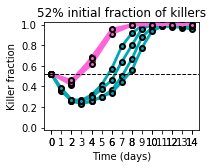

0    3
1    3
2    3
3    3
Name: TimeToAbove0.95 (h), dtype: int64
0    3
1    3
2    3
3    3
Name: TimeToAbove0.95 (h), dtype: int64


In [70]:
# Example data
times_24h_plot = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
times_48h_plot2 = [0,2,4,6,8,10,12,14]

# Colors
blue_color = '#00A9B4'
orange_color = '#FF65D9'

datav_24h = [[fv52_mean_0h,fv52_mean_0h,fv52_mean_0h,fv52_mean_0h], fv52_24h_24h, fv52_24h_48h, fv52_24h_72h, fv52_24h_96h, fv52_24h_120h, fv52_24h_144h, fv52_24h_168h, fv52_24h_192h, fv52_24h_216h, fv52_24h_240h, fv52_24h_264h, fv52_24h_288h, fv52_24h_312h, fv52_24h_336h]
datav_48h = [[fv52_mean_0h,fv52_mean_0h,fv52_mean_0h,fv52_mean_0h], fv52_48h_48h, fv52_48h_96h, fv52_48h_144h, fv52_48h_192h, fv52_48h_240h, fv52_48h_288h, fv52_48h_336h]

mean52_24h = np.mean(datav_24h,1)
mean52_48h = np.mean(datav_48h,1)

# Create the main plot
fig, ax = plt.subplots(figsize=(2.78,1.975))  # Change the size as needed

# Plot data for 24h cycle with reduced linewidth
for replicate_data in zip(*datav_24h):
    ax.plot(times_24h_plot, replicate_data, '-o', color=blue_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='24h Cycle' if replicate_data == datav_24h[0] else "")

# Plot data for 48h cycle with reduced linewidth
for replicate_data in zip(*datav_48h):
    ax.plot(times_48h_plot2, replicate_data, '-o', color=orange_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='48h Cycle' if replicate_data == datav_48h[0] else "")

# Add the horizontal line
ax.axhline(y=fv52_mean_0h, color='black', linestyle='--', linewidth=1)

ax.set_xticks(times_24h_plot + times_48h_plot2)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

ax.set_ylim(-0.02, 1.02)

ax.set_title('52% initial fraction of killers')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Killer fraction')

# Ensure the triangles are included in the legend only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Save the plot
plt.savefig('f52_dots.pdf')

# Show the plot
plt.show()

# Time to competitive exclusion
# thresholds
thru = 0.9
thrRRu = 1.5

# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_48h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_above_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    above_threshold = replicate_data > thru
    if np.any(above_threshold):
        idx = np.argmax(above_threshold)  # first time it drops below 0.1
        time_above = times[idx]
    else:
        time_above = np.nan
    time_to_above_thr.append(time_above)

# Results as pandas Series
times48_ext_52init = pd.Series(time_to_above_thr, name="TimeToAbove0.95 (h)")
print(times48_ext_52init)

thrR = thrRRu*fv52_mean_0h

# Initialize results
time_to_above_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    above_threshold = replicate_data > thrR
    if np.any(above_threshold):
        idx = np.argmax(above_threshold)  # first time it drops below 0.1
        time_above = times[idx]
    else:
        time_above = np.nan
    time_to_above_thr.append(time_above)

# Results as pandas Series
times48_ext_52initR = pd.Series(time_to_above_thr, name="TimeToAbove0.95 (h)")
print(times48_ext_52initR)

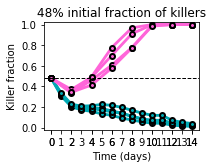

In [71]:
datav_24h = [[fv48_mean_0h,fv48_mean_0h,fv48_mean_0h,fv48_mean_0h], fv48_24h_24h, fv48_24h_48h, fv48_24h_72h, fv48_24h_96h, fv48_24h_120h, fv48_24h_144h, fv48_24h_168h, fv48_24h_192h, fv48_24h_216h, fv48_24h_240h, fv48_24h_240h, fv48_24h_288h, fv48_24h_312h, fv48_24h_336h]
datav_48h = [[fv48_mean_0h,fv48_mean_0h,fv48_mean_0h,fv48_mean_0h], fv48_48h_48h, fv48_48h_96h, fv48_48h_144h, fv48_48h_192h, fv48_48h_240h, fv48_48h_288h, fv48_48h_336h]

mean48_24h = np.mean(datav_24h,1)
mean48_48h = np.mean(datav_48h,1)

# Create the main plot
fig, ax = plt.subplots(figsize=(2.78,1.975))  # Change the size as needed

# Plot data for 24h cycle with reduced linewidth
for replicate_data in zip(*datav_24h):
    ax.plot(times_24h_plot, replicate_data, '-o', color=blue_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='24h Cycle' if replicate_data == datav_24h[0] else "")

# Plot data for 48h cycle with reduced linewidth
for replicate_data in zip(*datav_48h):
    ax.plot(times_48h_plot2, replicate_data, '-o', color=orange_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='48h Cycle' if replicate_data == datav_48h[0] else "")

# Add the horizontal line
ax.axhline(y=fv48_mean_0h, color='black', linestyle='--', linewidth=1)

ax.set_xticks(times_24h_plot + times_48h_plot2)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# ax.set_xlim(-1, max(times_24h_bplot)+1)  # Adjust the limits as needed to ensure the entire width of the points is plotted
ax.set_ylim(-0.02, 1.02)

ax.set_title('48% initial fraction of killers')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Killer fraction')

# Ensure the triangles are included in the legend only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Save the plot
plt.savefig('f48_dots.pdf')

# Show the plot
plt.show()

In [72]:
# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_24h)
n_timepoints, n_replicates = data.shape

thr = 0.05

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_below_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thr
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_48init = pd.Series(time_to_below_thr, name="TimeToBelow0.1 (h)")
print(times_ext_48init)

# Initialize results
time_to_below_thr = []

thrRR = 0.1
thrR = thrRR*fv48_mean_0h

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thrR
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_48initR = pd.Series(time_to_below_thr, name="TimeToBelow0.1init (h)")
print(times_ext_48initR)

# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_48h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_above_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    above_threshold = replicate_data > thru
    if np.any(above_threshold):
        idx = np.argmax(above_threshold)  # first time it drops below 0.1
        time_above = times[idx]
    else:
        time_above = np.nan
    time_to_above_thr.append(time_above)

# Results as pandas Series
times48_ext_48init = pd.Series(time_to_above_thr, name="TimeToAbove0.95 (h)")
print(times48_ext_48init)

thrR = thrRRu*fv48_mean_0h

# Initialize results
time_to_above_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    above_threshold = replicate_data > thrR
    if np.any(above_threshold):
        idx = np.argmax(above_threshold)  # first time it drops below 0.1
        time_above = times[idx]
    else:
        time_above = np.nan
    time_to_above_thr.append(time_above)

# Results as pandas Series
times48_ext_48initR = pd.Series(time_to_above_thr, name="TimeToAbove0.95 (h)")
print(times48_ext_48initR)

0    10
1    12
2    12
3    14
Name: TimeToBelow0.1 (h), dtype: int64
0    10
1    12
2    12
3    14
Name: TimeToBelow0.1init (h), dtype: int64
0    4
1    5
2    4
3    5
Name: TimeToAbove0.95 (h), dtype: int64
0    4
1    4
2    3
3    4
Name: TimeToAbove0.95 (h), dtype: int64


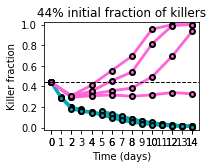

0    10
1     9
2    11
3     9
Name: TimeToBelow0.05 (h), dtype: int64
0    10
1     9
2    11
3     9
Name: TimeToBelow0.1init (h), dtype: int64
0    7.0
1    5.0
2    NaN
3    6.0
Name: TimeToAbove0.95 (h), dtype: float64
0    6.0
1    4.0
2    NaN
3    5.0
Name: TimeToAbove0.95 (h), dtype: float64


In [73]:
datav_24h = [[fv44_mean_0h,fv44_mean_0h,fv44_mean_0h,fv44_mean_0h], fv44_24h_24h, fv44_24h_48h, fv44_24h_72h, fv44_24h_96h, fv44_24h_120h, fv44_24h_144h, fv44_24h_168h, fv44_24h_192h, fv44_24h_216h, fv44_24h_240h, fv44_24h_264h, fv44_24h_288h, fv44_24h_312h, fv44_24h_336h]
datav_48h = [[fv44_mean_0h,fv44_mean_0h,fv44_mean_0h,fv44_mean_0h], fv44_48h_48h, fv44_48h_96h, fv44_48h_144h, fv44_48h_192h, fv44_48h_240h, fv44_48h_288h, fv44_48h_336h]

mean44_24h = np.mean(datav_24h,1)
mean44_48h = np.mean(datav_48h,1)

# Create the main plot
fig, ax = plt.subplots(figsize=(2.78,1.975))  # Change the size as needed

# Plot data for 24h cycle with reduced linewidth
for replicate_data in zip(*datav_24h):
    ax.plot(times_24h_plot, replicate_data, '-o', color=blue_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='24h Cycle' if replicate_data == datav_24h[0] else "")

# Plot data for 48h cycle with reduced linewidth
for replicate_data in zip(*datav_48h):
    ax.plot(times_48h_plot2, replicate_data, '-o', color=orange_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='48h Cycle' if replicate_data == datav_48h[0] else "")

# Add the horizontal line
ax.axhline(y=fv44_mean_0h, color='black', linestyle='--', linewidth=1)

ax.set_xticks(times_24h_plot + times_48h_plot2)

ax.set_xticks(times_24h_plot + times_48h_plot2)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# ax.set_xlim(-1, max(times_24h_bplot)+1)  # Adjust the limits as needed to ensure the entire width of the points is plotted
ax.set_ylim(-0.02, 1.02)

ax.set_title('44% initial fraction of killers')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Killer fraction')

# Ensure the triangles are included in the legend only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
# ax.legend(handles=unique_handles, labels=unique_labels)

# Save the plot
plt.savefig('f44_dots.pdf')

# Show the plot
plt.show()

# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_24h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_below_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thr
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_44init = pd.Series(time_to_below_thr, name="TimeToBelow0.05 (h)")
print(times_ext_44init)

# Initialize results
time_to_below_thr = []

thrR = thrRR*fv48_mean_0h

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thrR
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_44initR = pd.Series(time_to_below_thr, name="TimeToBelow0.1init (h)")
print(times_ext_44initR)

# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_48h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_above_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    above_threshold = replicate_data > thru
    if np.any(above_threshold):
        idx = np.argmax(above_threshold)  # first time it drops below 0.1
        time_above = times[idx]
    else:
        time_above = np.nan
    time_to_above_thr.append(time_above)

# Results as pandas Series
times48_ext_44init = pd.Series(time_to_above_thr, name="TimeToAbove0.95 (h)")
print(times48_ext_44init)

thrR = thrRRu*fv44_mean_0h

# Initialize results
time_to_above_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    above_threshold = replicate_data > thrR
    if np.any(above_threshold):
        idx = np.argmax(above_threshold)
        time_above = times[idx]
    else:
        time_above = np.nan
    time_to_above_thr.append(time_above)

# Results as pandas Series
times48_ext_44initR = pd.Series(time_to_above_thr, name="TimeToAbove0.95 (h)")
print(times48_ext_44initR)

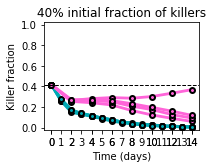

0    7
1    8
2    8
3    8
Name: TimeToBelow0.05 (h), dtype: int64
0    8
1    9
2    8
3    8
Name: TimeToBelow0.1init (h), dtype: int64


In [74]:
datav_24h = [[fv40_mean_0h,fv40_mean_0h,fv40_mean_0h,fv40_mean_0h], fv40_24h_24h, fv40_24h_48h, fv40_24h_72h, fv40_24h_96h, fv40_24h_120h, fv40_24h_144h, fv40_24h_168h, fv40_24h_192h, fv40_24h_216h, fv40_24h_240h, fv40_24h_264h, fv40_24h_288h, fv40_24h_312h, fv40_24h_336h]
datav_48h = [[fv40_mean_0h,fv40_mean_0h,fv40_mean_0h,fv40_mean_0h], fv40_48h_48h, fv40_48h_96h, fv40_48h_144h, fv40_48h_192h, fv40_48h_240h, fv40_48h_288h, fv40_48h_336h]

mean40_24h = np.mean(datav_24h,1)
mean40_48h = np.mean(datav_48h,1)

# Create the main plot
fig, ax = plt.subplots(figsize=(2.78,1.975))  # Change the size as needed

# Plot data for 24h cycle with reduced linewidth
for replicate_data in zip(*datav_24h):
    ax.plot(times_24h_plot, replicate_data, '-o', color=blue_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='24h Cycle' if replicate_data == datav_24h[0] else "")

# Plot data for 48h cycle with reduced linewidth
for replicate_data in zip(*datav_48h):
    ax.plot(times_48h_plot2, replicate_data, '-o', color=orange_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='48h Cycle' if replicate_data == datav_48h[0] else "")

# Add the horizontal line
ax.axhline(y=fv40_mean_0h, color='black', linestyle='--', linewidth=1)

ax.set_xticks(times_24h_plot + times_48h_plot2)

ax.set_xticks(times_24h_plot + times_48h_plot2)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# ax.set_xlim(-1, max(times_24h_bplot)+1)  # Adjust the limits as needed to ensure the entire width of the points is plotted
ax.set_ylim(-0.02, 1.02)

ax.set_title('40% initial fraction of killers')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Killer fraction')

# Ensure the triangles are included in the legend only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
# ax.legend(handles=unique_handles, labels=unique_labels)

# Save the plot
plt.savefig('f40_dots.pdf')

# Show the plot
plt.show()

# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_24h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_below_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thr
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_40init = pd.Series(time_to_below_thr, name="TimeToBelow0.05 (h)")
print(times_ext_40init)

# Initialize results
time_to_below_thr = []

thrR = thrRR*fv40_mean_0h

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thrR
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_40initR = pd.Series(time_to_below_thr, name="TimeToBelow0.1init (h)")
print(times_ext_40initR)

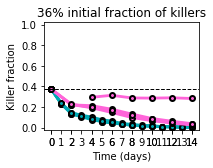

0    6
1    6
2    7
3    7
Name: TimeToBelow0.05 (h), dtype: int64
0    7
1    7
2    8
3    7
Name: TimeToBelow0.1initR (h), dtype: int64
0    6.0
1    NaN
2    7.0
3    7.0
Name: TimeToBelow0.05 (h), dtype: float64
0    7.0
1    NaN
2    NaN
3    7.0
Name: TimeToBelow0.1initR (h), dtype: float64


In [75]:
datav_24h = [[fv36_mean_0h,fv36_mean_0h,fv36_mean_0h,fv36_mean_0h], fv36_24h_24h, fv36_24h_48h, fv36_24h_72h, fv36_24h_96h, fv36_24h_120h, fv36_24h_144h, fv36_24h_168h, fv36_24h_192h, fv36_24h_216h, fv36_24h_240h, fv36_24h_264h, fv36_24h_288h, fv36_24h_312h, fv36_24h_336h]
datav_48h = [[fv36_mean_0h,fv36_mean_0h,fv36_mean_0h,fv36_mean_0h], fv36_48h_48h, fv36_48h_96h, fv36_48h_144h, fv36_48h_192h, fv36_48h_240h, fv36_48h_288h, fv36_48h_336h]

mean36_24h = np.mean(datav_24h,1)
mean36_48h = np.mean(datav_48h,1)

# Create the main plot
fig, ax = plt.subplots(figsize=(2.78,1.975))  # Change the size as needed

# Plot data for 24h cycle with reduced linewidth
for replicate_data in zip(*datav_24h):
    ax.plot(times_24h_plot, replicate_data, '-o', color=blue_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='24h Cycle' if replicate_data == datav_24h[0] else "")

# Plot data for 48h cycle with reduced linewidth
for replicate_data in zip(*datav_48h):
    ax.plot(times_48h_plot2, replicate_data, '-o', color=orange_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='48h Cycle' if replicate_data == datav_48h[0] else "")

# Add the horizontal line
ax.axhline(y=fv36_mean_0h, color='black', linestyle='--', linewidth=1)

# # Create custom legend handles
# line_24h = Line2D([0], [0], color=blue_color, marker='o', markeredgecolor='white', markersize=8, markeredgewidth=2.8, linestyle='-', linewidth=2.8, label='24h Cycle')
# line_48h = Line2D([0], [0], color=orange_color, marker='o', markeredgecolor='white', markersize=8, markeredgewidth=2.8, linestyle='-', linewidth=2.8, label='48h Cycle')
# dashed_line = Line2D([0], [0], color='black', linestyle='--', linewidth=1, label='Initial fraction')
# ax.legend(handles=[line_24h, line_48h, dashed_line])

ax.set_xticks(times_24h_plot + times_48h_plot2)

ax.set_xticks(times_24h_plot + times_48h_plot2)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# ax.set_xlim(-1, max(times_24h_bplot)+1)  # Adjust the limits as needed to ensure the entire width of the points is plotted
ax.set_ylim(-0.02, 1.02)

ax.set_title('36% initial fraction of killers')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Killer fraction')

# # Add inverted triangles for 48h treatment dilutions
# ax.scatter(times_48h_bplot, [ax.get_ylim()[0]]*len(times_48h_bplot), color='lightpink', marker='v', s=35, label='48h Dilution')

# # Add inverted triangles for 24h treatment dilutions
# ax.scatter(times_24h_bplot, [ax.get_ylim()[0]]*len(times_24h_bplot), color='lightskyblue', marker='v', s=35, label='24h Dilution')

# Ensure the triangles are included in the legend only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
# ax.legend(handles=unique_handles, labels=unique_labels)

# Save the plot
plt.savefig('f36_dots.pdf')

# Show the plot
plt.show()

# Compute time to extinction
# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_24h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_below_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thr
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_36init = pd.Series(time_to_below_thr, name="TimeToBelow0.05 (h)")
print(times_ext_36init)

# Initialize results
time_to_below_thr = []

thrR = thrRR*fv36_mean_0h

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thrR
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_36initR = pd.Series(time_to_below_thr, name="TimeToBelow0.1initR (h)")
print(times_ext_36initR)


# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_48h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_below_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thr
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times48_ext_36init = pd.Series(time_to_below_thr, name="TimeToBelow0.05 (h)")
print(times48_ext_36init)

# Initialize results
time_to_below_thr = []

thrR = thrRR*fv36_mean_0h

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thrR
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times48_ext_36initR = pd.Series(time_to_below_thr, name="TimeToBelow0.1initR (h)")
print(times48_ext_36initR)

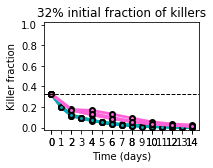

0    6
1    6
2    6
3    6
Name: TimeToBelow0.05 (h), dtype: int64
0    7
1    7
2    7
3    7
Name: TimeToBelow0.1initR (h), dtype: int64


In [76]:
datav_24h = [[fv32_mean_0h,fv32_mean_0h,fv32_mean_0h,fv32_mean_0h], fv32_24h_24h, fv32_24h_48h, fv32_24h_72h, fv32_24h_96h, fv32_24h_120h, fv32_24h_144h, fv32_24h_168h, fv32_24h_192h, fv32_24h_216h, fv32_24h_240h, fv32_24h_264h, fv32_24h_288h, fv32_24h_312h, fv32_24h_336h]
datav_48h = [[fv32_mean_0h,fv32_mean_0h,fv32_mean_0h,fv32_mean_0h], fv32_48h_48h, fv32_48h_96h, fv32_48h_144h, fv32_48h_192h, fv32_48h_240h, fv32_48h_288h, fv32_48h_336h]

mean32_24h = np.mean(datav_24h,1)
mean32_48h = np.mean(datav_48h,1)

# Create the main plot
fig, ax = plt.subplots(figsize=(2.78,1.975))  # Change the size as needed

# Plot data for 24h cycle with reduced linewidth
for replicate_data in zip(*datav_24h):
    ax.plot(times_24h_plot, replicate_data, '-o', color=blue_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='24h Cycle' if replicate_data == datav_24h[0] else "")

# Plot data for 48h cycle with reduced linewidth
for replicate_data in zip(*datav_48h):
    ax.plot(times_48h_plot2, replicate_data, '-o', color=orange_color, markeredgecolor='black', markersize=5, markeredgewidth=2, linewidth=2.8, label='48h Cycle' if replicate_data == datav_48h[0] else "")

# Add the horizontal line
ax.axhline(y=fv32_mean_0h, color='black', linestyle='--', linewidth=1)

ax.set_xticks(times_24h_plot + times_48h_plot2)

ax.set_xticks(times_24h_plot + times_48h_plot2)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

ax.set_ylim(-0.02, 1.02)

ax.set_title('32% initial fraction of killers')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Killer fraction')

# Ensure the triangles are included in the legend only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Save the plot
plt.savefig('f32_dots.pdf')

# Show the plot
plt.show()

# Convert to numpy array (rows: timepoints, cols: replicates)
data = np.array(datav_24h)
n_timepoints, n_replicates = data.shape

# Time vector (in hours)
times = np.arange(n_timepoints)

# Initialize results
time_to_below_thr = []

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thr
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_32init = pd.Series(time_to_below_thr, name="TimeToBelow0.05 (h)")
print(times_ext_32init)

# Initialize results
time_to_below_thr = []

thrR = thrRR*fv32_mean_0h

for rep in range(n_replicates):
    replicate_data = data[:, rep]
    below_threshold = replicate_data < thrR
    if np.any(below_threshold):
        idx = np.argmax(below_threshold)  # first time it drops below 0.1
        time_below = times[idx]
    else:
        time_below = np.nan
    time_to_below_thr.append(time_below)

# Results as pandas Series
times_ext_32initR = pd.Series(time_to_below_thr, name="TimeToBelow0.1initR (h)")
print(times_ext_32initR)

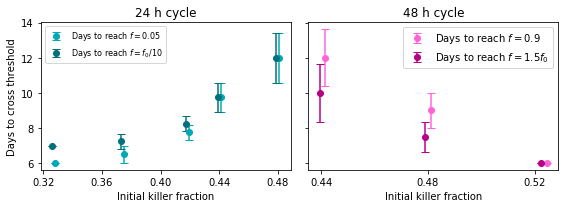

Spearman correlation: 0.958, p-value: 3.4e-11
Spearman correlation: 0.946, p-value: 3.22e-10
Spearman correlation: -0.943, p-value: 1.37e-05
Spearman correlation: -0.878, p-value: 0.000374


In [77]:
from scipy.stats import spearmanr

# Flatten all times and initial fractions
initials = (
    [fv32_mean_0h]*len(times_ext_32init) +
    [fv36_mean_0h]*len(times_ext_36init) +
    [fv40_mean_0h]*len(times_ext_40init) +
    [fv44_mean_0h]*len(times_ext_44init) +
    [fv48_mean_0h]*len(times_ext_48init)
)

extinction_times = (
    list(times_ext_32init) +
    list(times_ext_36init) +
    list(times_ext_40init) +
    list(times_ext_44init) +
    list(times_ext_48init)
)

extinction_timesR = (
    list(times_ext_32initR) +
    list(times_ext_36initR) +
    list(times_ext_40initR) +
    list(times_ext_44initR) +
    list(times_ext_48initR)
)

# Remove NaNs (if some replicates never dropped below 0.05)
initials_np = np.array(initials)
ext_times_np = np.array(extinction_times)
ext_timesR_np = np.array(extinction_timesR)
valid = ~np.isnan(ext_times_np)
validR = ~np.isnan(ext_timesR_np)

# Unique initial fractions
unique_inits = sorted(set(initials_np))

# Compute means and stds for each initial fraction
means = [np.mean(ext_times_np[initials_np == val]) for val in unique_inits]
stds  = [np.std(ext_times_np[initials_np == val]) for val in unique_inits]
# Compute means and stds for each initial fraction
meansR = [np.mean(ext_timesR_np[initials_np == val]) for val in unique_inits]
stdsR  = [np.std(ext_timesR_np[initials_np == val]) for val in unique_inits]

# Flatten all times and initial fractions
initials48 = (
    [fv44_mean_0h]*len(times48_ext_44init) +
    [fv48_mean_0h]*len(times48_ext_48init) +
    [fv52_mean_0h]*len(times48_ext_52init) 
)

extinction_times48 = (
    list(times48_ext_44init) +
    list(times48_ext_48init) +
    list(times48_ext_52init)
)

extinction_times48R = (
    list(times48_ext_44initR) +
    list(times48_ext_48initR) +
    list(times48_ext_52initR)
)

# Remove NaNs (if some replicates never dropped below 0.05)
initials48_np = np.array(initials48)
ext_times48_np = np.array(extinction_times48)
ext_times48R_np = np.array(extinction_times48R)
valid48 = ~np.isnan(ext_times48_np)
valid48R = ~np.isnan(ext_times48R_np)

# Unique initial fractions
unique48_inits = sorted(set(initials48_np))

# multiply by 2 because interdilution time is 48h
# Compute means and stds for each initial fraction
means48 = [2*np.nanmean(ext_times48_np[initials48_np == val]) for val in unique48_inits]
stds48  = [2*np.nanstd(ext_times48_np[initials48_np == val]) for val in unique48_inits]
# Compute means and stds for each initial fraction
means48R = [2*np.nanmean(ext_times48R_np[initials48_np == val]) for val in unique48_inits]
stds48R  = [2*np.nanstd(ext_times48R_np[initials48_np == val]) for val in unique48_inits]

# Convert x-tick values to numpy arrays so we can offset them
unique_inits_np = np.array(unique_inits)
unique48_inits_np = np.array(unique48_inits)

blue_colorR = '#00717a'     # darker version of #00A9B4
orange_colorR = '#b70088'   # darker version of #FF65D9

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# --- Left subplot: 24 h dilution ---
axs[0].errorbar(unique_inits_np + 0.001, means, yerr=stds, fmt='o', color=blue_color, capsize=4, label='Days to reach $f = 0.05$')
axs[0].errorbar(unique_inits_np - 0.001, meansR, yerr=stdsR, fmt='o', color=blue_colorR, capsize=4, label='Days to reach $f = f_0/10$')
axs[0].set_xlabel("Initial killer fraction")
axs[0].set_ylabel("Days to cross threshold")
axs[0].set_xticks([0.32, 0.36, 0.40, 0.44, 0.48])
axs[0].set_title("24 h cycle")
axs[0].legend(fontsize=8, loc='upper left')

# --- Right subplot: 48 h dilution ---
axs[1].errorbar(unique48_inits_np + 0.001, means48, yerr=stds48, fmt='o', color=orange_color, capsize=4, label='Days to reach $f = 0.9$')
axs[1].errorbar(unique48_inits_np - 0.001, means48R, yerr=stds48R, fmt='o', color=orange_colorR, capsize=4, label='Days to reach $f = 1.5 f_0$')
axs[1].set_xlabel("Initial killer fraction")
axs[1].set_xticks([0.44, 0.48, 0.52])
axs[1].set_title("48 h cycle")
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig("extinction_time_comparison.pdf")
plt.show()

# Spearman test
rho, pval = spearmanr(initials_np[valid], ext_times_np[valid])
print("Spearman correlation: {:.3f}, p-value: {:.3g}".format(rho, pval))
rho, pval = spearmanr(initials_np[valid], ext_timesR_np[validR])
print("Spearman correlation: {:.3f}, p-value: {:.3g}".format(rho, pval))
# Spearman test
rho, pval = spearmanr(initials48_np[valid48], ext_times48_np[valid48])
print("Spearman correlation: {:.3f}, p-value: {:.3g}".format(rho, pval))
rho, pval = spearmanr(initials48_np[valid48R], ext_times48R_np[valid48R])
print("Spearman correlation: {:.3f}, p-value: {:.3g}".format(rho, pval))